In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.model_selection import cross_validate, cross_val_score, train_test_split
from dsexamples.house_prices import data as df

### Question 1

Display the data types of each column using the function dtypes, then take a screenshot and submit it, include your code in the image.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0                  21613 non-null  int64  
 1   id             21613 non-null  int64  
 2   date           21613 non-null  object 
 3   price          21613 non-null  float64
 4   bedrooms       21600 non-null  float64
 5   bathrooms      21603 non-null  float64
 6   sqft_living    21613 non-null  int64  
 7   sqft_lot       21613 non-null  int64  
 8   floors         21613 non-null  float64
 9   waterfront     21613 non-null  int64  
 10  view           21613 non-null  int64  
 11  condition      21613 non-null  int64  
 12  grade          21613 non-null  int64  
 13  sqft_above     21613 non-null  int64  
 14  sqft_basement  21613 non-null  int64  
 15  yr_built       21613 non-null  int64  
 16  yr_renovated   21613 non-null  int64  
 17  zipcode        21613 non-null  int64  
 18  lat   

### Question 2

Drop the columns <code>"id"</code>  and <code>"Unnamed: 0"</code> from axis 1 using the method <code>drop()</code>, then use the method <code>describe()</code> to obtain a statistical summary of the data. Take a screenshot and submit it, make sure the <code>inplace</code> parameter is set to <code>True</code>

In [4]:
df.drop(columns=["id", ""], inplace=True)
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
print("number of NaN values for the column bedrooms :",
      df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :",
      df['bathrooms'].isnull().sum())


number of NaN values for the column bedrooms : 13
number of NaN values for the column bathrooms : 10


In [6]:
def replace_nan_by_mean(column):
    """
    Replace NAs with the mean of the column over the entire dataset.
    """
    avg_col = column.astype("float").mean(axis=0)
    print("Average of {0}:".format(column.name), avg_col)
    return column.replace(np.nan, avg_col, inplace=True)

replace_nan_by_mean(df['bedrooms'])
replace_nan_by_mean(df['bathrooms'])

Average of bedrooms: 3.37287037037037
Average of bathrooms: 2.1157362403369904


In [7]:
print("number of NaN values for the column bedrooms :",
      df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :",
      df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 0
number of NaN values for the column bathrooms : 0


### Question 3

Use the method <code>value_counts</code> to count the number of houses with unique floor values, use the method <code>.to_frame()</code> to convert it to a dataframe.

In [8]:
df[['floors']].value_counts().to_frame()

,0
floors,
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


### Question 4

Use the function <code>boxplot</code> in the seaborn library  to  determine whether houses with a waterfront view or without a waterfront view have more price outliers.


<AxesSubplot:xlabel='waterfront', ylabel='price'>

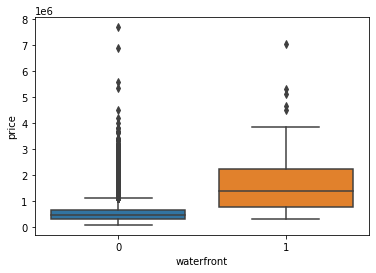

In [9]:
sns.boxplot(x="waterfront", y="price", data=df)


### Question 5

Use the function <code>regplot</code>  in the seaborn library  to  determine if the feature <code>sqft_above</code> is negatively or positively correlated with price.


<AxesSubplot:xlabel='sqft_above', ylabel='price'>

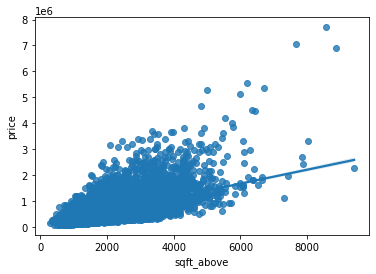

In [10]:
sns.regplot(x="sqft_above", y="price", data=df)

In [11]:
df.corr()['price'].sort_values()

zipcode         -0.053203
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308797
sqft_basement    0.323816
view             0.397293
bathrooms        0.525738
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

### Question  6

Fit a linear regression model to predict the <code>'price'</code> using the feature <code>'sqft_living'</code> then calculate the R^2. Take a screenshot of your code and the value of the R^2.


In [12]:
X = df[['sqft_living']]
Y = df['price']
lm = LinearRegression()
lm.fit(X, Y)
lm.score(X, Y)

0.4928532179037931

### Question 7

Fit a linear regression model to predict the <code>'price'</code> using the list of features:


In [13]:
features = ["floors", "waterfront", "lat", "bedrooms", "sqft_basement",
            "view", "bathrooms", "sqft_living15", "sqft_above", "grade", "sqft_living"]


In [14]:
X = df[features]
Y = df['price']
lm = LinearRegression()
lm.fit(X, Y)
lm.score(X, Y)


0.6576977861710804

### Question 8

Use the list to create a pipeline object to predict the 'price', fit the object using the features in the list <code>features</code>, and calculate the R^2.

In [15]:
Input = [('scale', StandardScaler()), ('polynomial', PolynomialFeatures(
    include_bias=False)), ('model', LinearRegression())]

p=Pipeline(Input, verbose=True)
p.fit(X, Y)
p.score(X,Y)

[Pipeline] ............. (step 1 of 3) Processing scale, total=   0.0s
[Pipeline] ........ (step 2 of 3) Processing polynomial, total=   0.0s
[Pipeline] ............. (step 3 of 3) Processing model, total=   0.1s


0.7512802595973938

### Question 9

Create and fit a Ridge regression object using the training data, set the regularization parameter to 0.1, and calculate the R^2 using the test data.


In [16]:
x_train, x_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.15, random_state=1)


print("number of test samples:", x_test.shape[0])
print("number of training samples:", x_train.shape[0])

lr = Ridge(alpha=0.1)
lr.fit(x_train, y_train)
lr.score(x_test, y_test)


number of test samples: 3242
number of training samples: 18371


0.6478759163939114

### Question 10

Perform a second order polynomial transform on both the training data and testing data. Create and fit a Ridge regression object using the training data, set the regularisation parameter to 0.1, and calculate the R^2 utilising the test data provided. Take a screenshot of your code and the R^2.


In [17]:
r = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('ridge', Ridge(alpha=0.1))
], verbose=True)

r.fit(x_train, y_train)
r.score(x_test, y_test)


[Pipeline] .............. (step 1 of 2) Processing poly, total=   0.0s
[Pipeline] ............. (step 2 of 2) Processing ridge, total=   0.1s


0.7002744258188097